In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, log_loss

In [19]:
# Load the train and test datasets
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [20]:
print(train_df.shape)
train_df.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
print(test_df.shape)
test_df.head()

(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# put labels into y_train variable
Y_train = train_df["label"]
Y_test = test_df["label"]

# Drop 'label' column
X_train = train_df.drop(labels = ["label"],axis = 1)
X_test = test_df.drop(labels = ["label"], axis = 1)

print("X_train shape is: ", X_train.shape)
print("X_test shape is: ", X_test.shape)

X_train shape is:  (60000, 784)
X_test shape is:  (10000, 784)


C:\Users\mo231\AppData\Local\Temp\ipykernel_20944\2156180878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=Y_train, palette="icefire")


label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

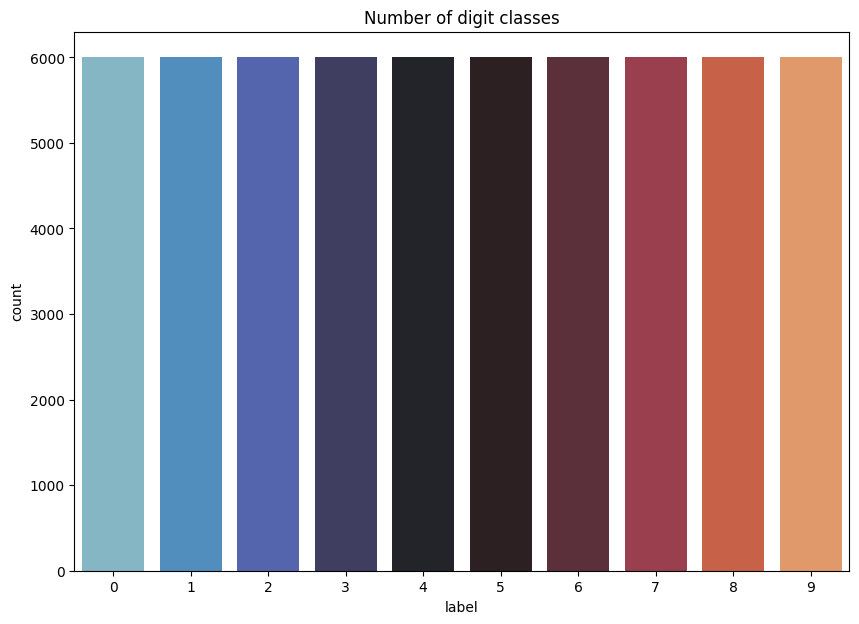

In [23]:
# visualize number of digits classes
plt.figure(figsize=(10,7))
sns.countplot(x=Y_train, palette="icefire")
plt.title("Number of digit classes")

Y_train.value_counts()

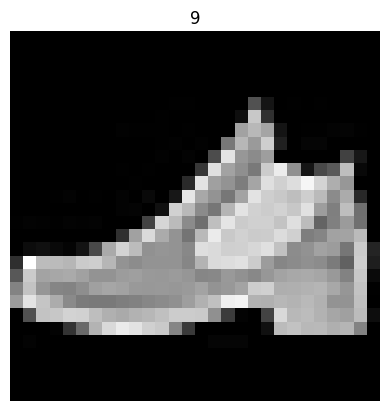

In [24]:
# plot some samples
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()
img = X_train[1]
img = img.reshape((28,28))


plt.imshow(img,cmap='gray')
plt.title(Y_train[1])
plt.axis("off")
plt.show()

In [25]:
train_nans = train_df.isna().sum().sum()
train_nans

np.int64(0)

In [26]:
test_nans = test_df.isna().sum().sum()
test_nans

np.int64(0)

In [27]:
# Reshape the images (if necessary, for Logistic Regression)
X_train = X_train.reshape(-1, 28 * 28)  # Flatten to 1D vector
X_test = X_test.reshape(-1, 28 * 28)    # Flatten to 1D vector

**Normalization**

In [28]:
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0
print("x_train shape: ",X_train.shape)
print("x_test shape: ",X_test.shape)

x_train shape:  (60000, 784)
x_test shape:  (10000, 784)


In [29]:
# Initialize the K-NN classifier
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p = 2)

# Train the model
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [30]:
# Make predictions on the test set
Y_pred = knn.predict(X_test)

In [31]:
Y_pred_proba = knn.predict_proba(X_train)

accuracy = accuracy_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred, average='macro')  # Use 'macro', 'micro', or 'weighted' depending on your needs
precision = precision_score(Y_test, Y_pred, average='macro')  # Choose average type
loss = log_loss(Y_train, Y_pred_proba)
conf_matrix = confusion_matrix(Y_test, Y_pred)


print(f"Accuracy: {accuracy}\nError rate: {1-accuracy}")
print("Recall:", recall)
print("Precision:", precision)
print("Loss: ",loss)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.8589
Error rate: 0.1411
Recall: 0.8589
Precision: 0.8613943216647832
Loss:  0.20878811613789466

Confusion Matrix:
[[874   1  16  11   5   0  86   2   5   0]
 [  4 965   7  14   1   0   9   0   0   0]
 [ 18   0 808  14  98   0  61   0   1   0]
 [ 36  11  14 882  32   0  25   0   0   0]
 [  4   0  99  26 799   0  70   0   2   0]
 [  1   0   1   1   0 816   8  98   4  71]
 [202   1 114  16  74   0 583   0  10   0]
 [  0   0   0   0   0   1   0 945   0  54]
 [  2   1  14   2   6   1  13   5 953   3]
 [  0   0   0   0   0   2   0  34   0 964]]


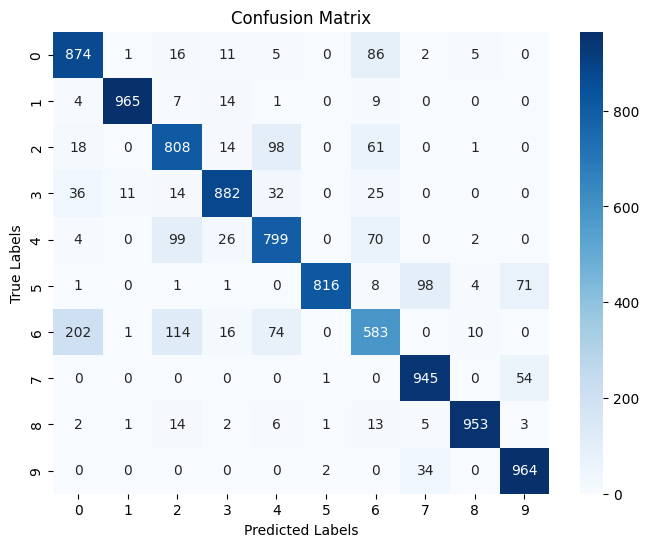

In [32]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.arange(10), yticklabels=np.arange(10))

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Macro-average AUC: 0.97


C:\Users\mo231\AppData\Local\Temp\ipykernel_20944\1739188310.py:27: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  roc_auc["macro"] = np.trapz(mean_tpr, all_fpr)


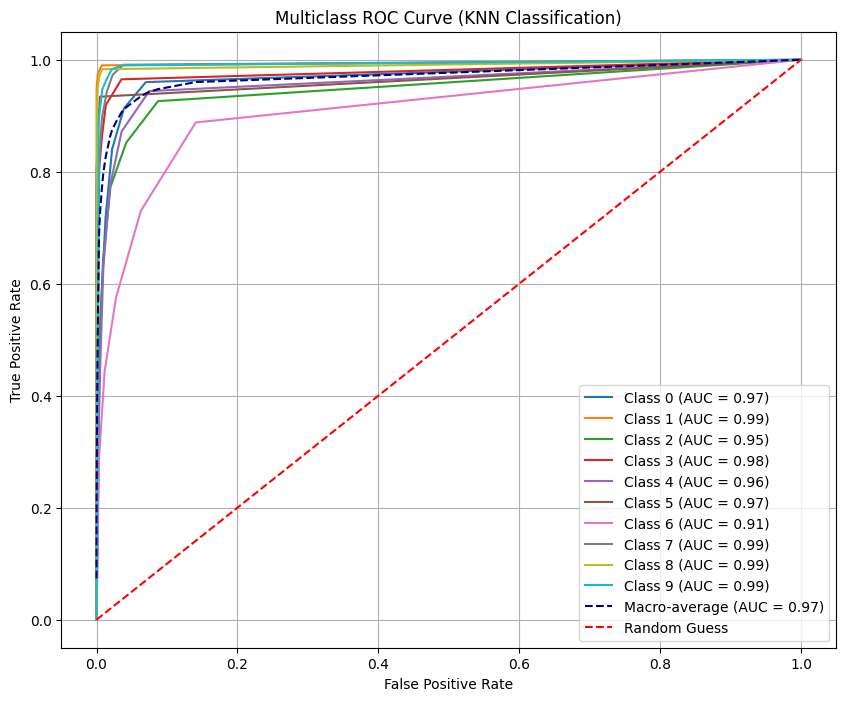

In [33]:
# Binarize the labels for multiclass classification
classes = np.unique(Y_train)
y_train_bin = label_binarize(Y_train, classes=classes)
y_test_bin = label_binarize(Y_test, classes=classes)

# Get probabilities for all classes
y_probs = knn.predict_proba(X_test)

# Initialize variables for ROC and AUC
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC and AUC for each class
for i, class_label in enumerate(classes):
    fpr[class_label], tpr[class_label], _ = roc_curve(y_test_bin[:, i], y_probs[:, i])
    roc_auc[class_label] = roc_auc_score(y_test_bin[:, i], y_probs[:, i])

# Compute macro-average ROC and AUC
all_fpr = np.unique(np.concatenate([fpr[c] for c in classes]))
mean_tpr = np.zeros_like(all_fpr)

for c in classes:
    mean_tpr += np.interp(all_fpr, fpr[c], tpr[c])

mean_tpr /= len(classes)
roc_auc["macro"] = np.trapz(mean_tpr, all_fpr)

print(f"Macro-average AUC: {roc_auc['macro']:.2f}")

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for class_label in classes:
    plt.plot(fpr[class_label], tpr[class_label], label=f"Class {class_label} (AUC = {roc_auc[class_label]:.2f})")

# Plot macro-average ROC
plt.plot(all_fpr, mean_tpr, label=f"Macro-average (AUC = {roc_auc['macro']:.2f})", color="navy", linestyle="--")

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label="Random Guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (KNN Classification)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


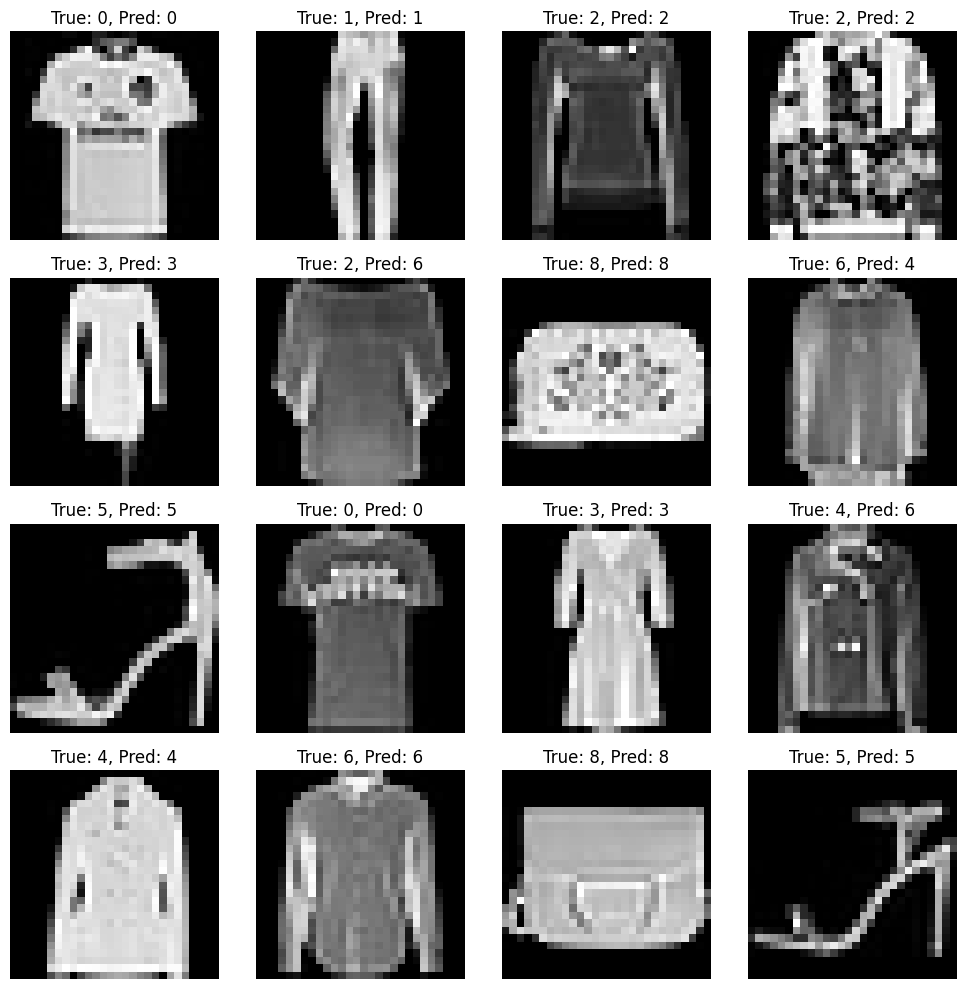

In [34]:
# Visualize a few predictions
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {Y_test[i]}, Pred: {Y_pred[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()